# LFV Higgs decays in the 2HDM with  SeeSaw type I

In [1]:
from sympy import init_printing,lambdify,Symbol, symbols, Matrix
from sympy import atan as atan_sp
init_printing()
import OneLoopLFVHD as lfvhd

In [2]:
from FF_symbolic import TrianglesOneFermion, TrianglesTwoFermion, Bubbles
from FF_symbolic import DiagramasWninj,DiagramasniWW,DiagramasniWH,DiagramasniHW
from FF_symbolic import DiagramasHninj,DiagramasniHH
from FF_symbolic import g, mW, mG, mHpm, mϕ, Uν, Uνc, mn, m, C, Cc, a,b,i
from FF_symbolic import j as jj
from FF_symbolic import ξlϕ, ξnϕ, ξlA, ξnA,α, β, Ξϕ, Kϕ, Qϕ,ρϕ, Δϕ,ηϕ, λ5

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from mpmath import *

In [5]:
mp.dps = 80; mp.pretty = True

In [6]:
import numpy as np

In [7]:
from multiprocessing import Pool, cpu_count
from time import time

In [8]:
cpu_count()

In [9]:
def speedup_array(f,array,procs=cpu_count()): 
    pool = Pool(procs,maxtasksperchild=100).map(f, array)
    result = np.array(list(pool))
    pool.close()
    return result

## Numeric implementation of form factors

**Neutrino benchmark** is given by 

In [10]:
from OneLoopLFVHD.neutrinos import NuOscObservables
Nudata = NuOscObservables

In [11]:
m1 = mpf('1e-12')  #GeV 

#current values to Square mass differences
d21 = mpf(str(Nudata.squareDm21.central))*mpf('1e-18')# factor to convert eV^2 to GeV^2
d31 = mpf(str(Nudata.squareDm31.central))*mpf('1e-18')

#d21 = 7.5e-5*1e-18
#d31 = 2.457e-3*1e-18
m2 = sqrt(m1**2 + d21)
m3 = sqrt(m1**2 + d31)

m4 = lambda m6: m6/3
m5 = lambda m6: m6/2

## Setting 2HDM

### Form factor with one fermion in the loop.

In [12]:
# for D in TrianglesOneFermion:
#     display(D.AL().atoms(Symbol))

#### AL one fermion 

In [13]:
from OneLoopLFVHD.data import ml

In [14]:
ma,mb = symbols('m_a,m_b',positive=True)
# valores_h ={mW:mpf('80.379'),mh:mpf('125.10'),g:(2*mpf('80.379'))/mpf('246')}
# valores_H ={mW:mpf('80.379'),mh:mpf('125.10'),g:(2*mpf('80.379'))/mpf('246')}
valoresSM ={mW:mpf('80.379'),g:(2*mpf('80.379'))/mpf('246')}

# cambios_hab = lambda a,b:{lfvhd.ma:valores_h[mh],lfvhd.mi:ml[a],lfvhd.mj:ml[b]}
cambios_lab = lambda mla,mlb:{lfvhd.mi:mla,lfvhd.mj:mlb}



Ubi, Ucai,mni = symbols('U_{bi}, {{U_{ai}^*}},m_{n_i}')
UnuOne = {mn[i]:mni,Uν[b,i]:Ubi,Uνc[a,i]:Ucai}

# from Unu_seesaw_2HDM import diagonalizationMnu
# diagonalizationMnu1 = lambda m1,m6,tb,doblet: diagonalizationMnu(
#     m1,m2,m3,m6/mpf('3.0'),m6/mpf('2.0'),m6,tb,doblet)

from Unu_seesaw import diagonalizationMnu

diagonalizationMnu1 = lambda m1,m6: diagonalizationMnu(
    m1,m2,m3,m6/mpf('3.0'),m6/mpf('2.0'),m6)

In [15]:
C0_sp, C1_sp, C2_sp, B120_sp, B10_sp,B11_sp,B20_sp,B21_sp = symbols('C0, C1, C2, B120, B10,B11,B20,B21')
cambios_pave_sympy = lambda M0,M1,M2: {lfvhd.C0(M0,M1,M2):C0_sp,lfvhd.C1(M0,M1,M2):C1_sp,
                                      lfvhd.C2(M0,M1,M2):C2_sp,lfvhd.B12_0(M1,M2):B120_sp,
                                      lfvhd.B1_0(M0,M1):B10_sp,lfvhd.B1_1(M0,M1):B11_sp,
                                      lfvhd.B2_0(M0,M2):B20_sp,lfvhd.B2_1(M0,M2):B21_sp}
cambiosniWW = cambios_pave_sympy(mn[i],mW,mW)
cambiosniWH = cambios_pave_sympy(mn[i],mW,mHpm)
cambiosniHW = cambios_pave_sympy(mn[i],mHpm,mW)
cambiosniHH = cambios_pave_sympy(mn[i],mHpm,mHpm)

cambiosWninj = cambios_pave_sympy(mW,mn[i],mn[jj])
cambiosHninj = cambios_pave_sympy(mHpm,mn[i],mn[jj])

#cambiosniWW

In [16]:
import OneLoopLFVHD.LFVHDFeynG_mpmath2 as lfvhd_mp# B1_0, B2_0, B1_1, B2_1, B12_0, C0, C1, C2

### Diagrams with One Fermion

In [17]:
from modelos_2HDM import coeff_typeI_h as coeff_h
from modelos_2HDM import tb, cab

In [18]:
mA = symbols('m_A',positive=True)
Kphi =  4*mA**2 - 3*mϕ**2- 2*mHpm**2
Qphi = mϕ**2 - 2*mHpm**2

cambios_coeff_h = {
    ξlϕ:coeff_h.xi_lphi, ξnϕ:coeff_h.xi_nphi, ξlA:coeff_h.xi_lA, 
    ξnA:coeff_h.xi_nA, Ξϕ:coeff_h.Xi_phi, ρϕ:coeff_h.rhophi, 
    Δϕ:coeff_h.Dphi,ηϕ:coeff_h.etaphi, Kφ:Kphi, Qφ:Qphi, β: atan_sp(tb)
    }

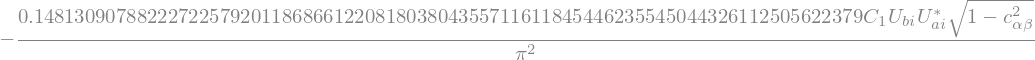

In [19]:
DiagramasniWW[0].AL().subs(cambiosniWW).subs(lfvhd.D,4).subs(
            lfvhd.B12_0(mW,mW),0).simplify().subs(
        cambios_lab(ml[2],ml[3])).subs(valoresSM).subs(UnuOne).subs(cambios_coeff_h)

In [20]:
def FF_simplified(A,mla,mlb,cambiosXYZ):
    return A.subs(cambiosXYZ).subs(lfvhd.D,4).subs(
            lfvhd.B12_0(mW,mW),0).simplify().subs(
        cambios_lab(mla,mlb)).subs(valoresSM).subs(UnuOne).subs(cambios_coeff_h)
# dia_niHH.AL().subs(cambiosniHH).subs(lfvhd.D,4).simplify().subs(
        # cambios_lab(mla,mlb)).subs(valoresSM).subs(UnuOne)

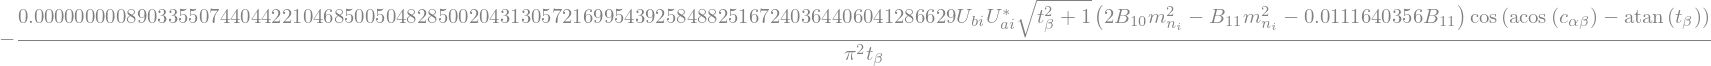

In [21]:
FF_simplified(DiagramasniWW[5].AL(),ml[2],ml[3],cambiosniWW)

#### Diagrams with $n_i WW$ numeric

In [22]:
####################
mW_val = valoresSM[mW]
C0_mp_niWW = lambda ms,mni_: lfvhd_mp.C0(ms,mni_,mW_val,mW_val)
C1_mp_niWW = lambda ms,mni_,mla: lfvhd_mp.C1(ms,mla,mni_,mW_val,mW_val)
C2_mp_niWW = lambda ms,mni_,mlb: lfvhd_mp.C2(ms,mlb,mni_,mW_val,mW_val)
B120_mp_niWW = lambda ms: lfvhd_mp.B12_0(ms,mW_val,mW_val)
B10_mp_niWW = lambda mni_,mla: lfvhd_mp.B1_0(mla,mni_,mW_val)
B11_mp_niWW = lambda mni_,mla: lfvhd_mp.B1_1(mla,mni_,mW_val)
B20_mp_niWW = lambda mni_,mlb: lfvhd_mp.B2_0(mlb,mni_,mW_val)
B21_mp_niWW = lambda mni_,mlb: lfvhd_mp.B2_1(mlb,mni_,mW_val)

FF_list_niWW = []
for dia_niWW in DiagramasniWW:
    A_sp_niWWL = lambda mla,mlb: FF_simplified(dia_niWW.AL(),mla,mlb,cambiosniWW)
    A_sp_niWWR = lambda mla,mlb: FF_simplified(dia_niWW.AR(),mla,mlb,cambiosniWW)


    #display(A_sp_niWWL(ml[1],ml[2]).atoms(Symbol))
    A_lamb_niWWL = lambda mla,mlb: lambdify([lfvhd.ma,mni,Ubi,Ucai, tb,cab,
                   C0_sp,C1_sp,C2_sp,B120_sp,B10_sp,B11_sp,B20_sp,B21_sp],
                                           A_sp_niWWL(mla,mlb),'mpmath')

    A_lamb_niWWR = lambda mla,mlb: lambdify([lfvhd.ma,mni,Ubi,Ucai, tb,cab,
                   C0_sp,C1_sp,C2_sp,B120_sp,B10_sp,B11_sp,B20_sp,B21_sp],
                                           A_sp_niWWR(mla,mlb),'mpmath')
    #print(A_lamb_niWWL(ml[2],ml[3])(1,2,3,4,5,6,7,8,9,10,11,12,13,14))


    def FFniWWL(ms,mla,mlb,mni_,Ubi_,Ucai_,tanb,Cab):
        return  A_lamb_niWWL(mla,mlb)(ms,mni_,Ubi_,Ucai_,tanb,Cab,
                C0_mp_niWW(ms,mni_),C1_mp_niWW(ms,mni_,mla),C2_mp_niWW(ms,mni_,mlb),
                B120_mp_niWW(ms),B10_mp_niWW(mni_,mla),B11_mp_niWW(mni_,mla),B20_mp_niWW(mni_,mlb),B21_mp_niWW(mni_,mlb))

    def FFniWWR(ms,mla,mlb,mni_,Ubi_,Ucai_,tanb, Cab):
        return A_lamb_niWWR(mla,mlb)(ms,mni_,Ubi_,Ucai_,tanb, Cab,
                C0_mp_niWW(ms,mni_),C1_mp_niWW(ms,mni_,mla),C2_mp_niWW(ms,mni_,mlb),
                B120_mp_niWW(ms),B10_mp_niWW(mni_,mla),B11_mp_niWW(mni_,mla),B20_mp_niWW(mni_,mlb),B21_mp_niWW(mni_,mlb))

    FF_list_niWW.append({'L':FFniWWL,'R':FFniWWR})
    

In [38]:
%%time
(
    FF_list_niWW[3]['L'](mpf('125.10'),2,3,4,5,6,7,8),
    FF_list_niWW[3]['R'](mpf('125.10'),2,3,4,5,6,7,8)
)

CPU times: user 1.97 s, sys: 8.67 ms, total: 1.98 s
Wall time: 2.57 s


((-0.000010209680526370155995728461444738746816848751162841657761038489302948297790557378 - 0.000070907223550260456426385979832249432700133849987714798781535892706958620500578438j),
 (-0.000010204182497770945825311475542691848350482299484187310338433067620265291742648896 - 0.000070869039207277050253880864321324086006603405086810059836475510730754626728054162j))

#### Diagrams with $n_i HH$ numeric

In [23]:
####################
####################
#ms = symbols('m_s',real=True)
C0_mp_niHH = lambda ms,mni_,mHpm: lfvhd_mp.C0(ms,mni_,mHpm,mHpm)
C1_mp_niHH = lambda ms,mni_,mla,mHpm: lfvhd_mp.C1(ms,mla,mni_,mHpm,mHpm)
C2_mp_niHH = lambda ms,mni_,mlb,mHpm: lfvhd_mp.C2(ms,mlb,mni_,mHpm,mHpm)
B10_mp_niHH = lambda mni_,mla,mHpm: lfvhd_mp.B1_0(mla,mni_,mHpm)
B11_mp_niHH = lambda mni_,mla,mHpm: lfvhd_mp.B1_1(mla,mni_,mHpm)
B20_mp_niHH = lambda mni_,mlb,mHpm: lfvhd_mp.B2_0(mlb,mni_,mHpm)
B21_mp_niHH = lambda mni_,mlb,mHpm: lfvhd_mp.B2_1(mlb,mni_,mHpm)

###################3
FF_list_niHH = []
for dia_niHH in DiagramasniHH:
    A_sp_niHHL = lambda mla,mlb: FF_simplified(dia_niHH.AL(), mla, mlb, cambiosniHH)
    A_sp_niHHR = lambda mla,mlb: FF_simplified(dia_niHH.AR(), mla, mlb, cambiosniHH)
    
    
    #display(A_sp_niHHL(ml[1],ml[2]).atoms(Symbol))
    A_lamb_niHHL = lambda mla,mlb: lambdify([lfvhd.ma, mni, Ubi, Ucai, mHpm, tb, cab, λ5,
                   C0_sp,C1_sp,C2_sp,B10_sp,B11_sp,B20_sp,B21_sp],
                                           A_sp_niHHL(mla,mlb),'mpmath')
    
    A_lamb_niHHR = lambda mla,mlb: lambdify([lfvhd.ma, mni, Ubi, Ucai, mHpm, tb, cab, λ5,
                   C0_sp,C1_sp,C2_sp,B10_sp,B11_sp,B20_sp,B21_sp],
                                           A_sp_niHHR(mla,mlb),'mpmath')
    #.subs(typeI_ξh).subs(common_factor_h).subs(lfvhd.ma,mh).subs(mh,mpf('125.10'))
    def FFniHHL(ms_val,mla,mlb,mni_,Ubi_,Ucai_,mHpm, tanb, Cab,l5):
        return A_lamb_niHHL(mla,mlb)(ms_val,mni_,Ubi_,Ucai_,mHpm, tanb, Cab,l5,
                C0_mp_niHH(ms_val,mni_,mHpm),C1_mp_niHH(ms_val,mni_,mla,mHpm),
                C2_mp_niHH(ms_val,mni_,mlb,mHpm),
                B10_mp_niHH(mni_,mla,mHpm),B11_mp_niHH(mni_,mla,mHpm),
                 B20_mp_niHH(mni_,mlb,mHpm),B21_mp_niHH(mni_,mlb,mHpm))
    
    def FFniHHR(ms_val,mla,mlb,mni_,Ubi_,Ucai_,mHpm, tanb, Cab,l5):
        return A_lamb_niHHR(mla,mlb)(ms_val,mni_,Ubi_,Ucai_,mHpm, tanb, Cab,l5,
                C0_mp_niHH(ms_val,mni_,mHpm),C1_mp_niHH(ms_val,mni_,mla,mHpm),
                C2_mp_niHH(ms_val,mni_,mlb,mHpm),
                B10_mp_niHH(mni_,mla,mHpm),B11_mp_niHH(mni_,mla,mHpm),
                 B20_mp_niHH(mni_,mlb,mHpm),B21_mp_niHH(mni_,mlb,mHpm))
    
    FF_list_niHH.append({'L':FFniHHL,'R':FFniHHR})

In [40]:
(
    FF_list_niHH[0]['L'](mpf('125.10'),.2,.3,.4,.5,.6,.7,.8,.9,.10),
    FF_list_niHH[0]['R'](mpf('125.10'),.2,.3,.4,.5,.6,.7,.8,.9,.10)
)

((-0.000000000086462365637142228358843343348268976592897453002603526433818136560810731826460865 + 0.0j),
 (-0.000000000077727097898518870633826151506403744429720402967307143882478583960327654903973705 + 0.0j))

#### Diagrams with $n_i WH$ numeric

In [24]:
####################
####################
#ms = symbols('m_s',real=True)
C0_mp_niWH = lambda ms,mni_,mHpm: lfvhd_mp.C0(ms,mni_,mW_val,mHpm)
C1_mp_niWH = lambda ms,mni_,mla,mHpm: lfvhd_mp.C1(ms,mla,mni_,mW_val,mHpm)
C2_mp_niWH = lambda ms,mni_,mlb,mHpm: lfvhd_mp.C2(ms,mlb,mni_,mW_val,mHpm)

###################3

FF_list_niWH = []
for dia_niWH in DiagramasniWH:
    A_sp_niWHL = lambda mla,mlb: FF_simplified(dia_niWH.AL(), mla, mlb, cambiosniWH)#.subs(lfvhd.B12_0(mW,mHpm),0)
    A_sp_niWHR = lambda mla,mlb: FF_simplified(dia_niWH.AR(), mla, mlb, cambiosniWH)#.subs(lfvhd.B12_0(mW,mHpm),0)
    
    
    #display(A_sp_niWHR(ml[1],ml[2]))
    A_lamb_niWHL = lambda mla,mlb: lambdify([lfvhd.ma,mni,Ubi,Ucai,mHpm,tb,cab,
                   C0_sp,C1_sp,C2_sp], A_sp_niWHL(mla,mlb),'mpmath')
    
    A_lamb_niWHR = lambda mla,mlb: lambdify([lfvhd.ma,mni,Ubi,Ucai,mHpm,tb,cab,
                   C0_sp,C1_sp,C2_sp], A_sp_niWHR(mla,mlb),'mpmath')
    
    #.subs(typeI_ξh).subs(common_factor_h).subs(lfvhd.ma,mh).subs(mh,mpf('125.10'))
    def FFniWHL(ms_val,mla,mlb,mni_,Ubi_,Ucai_,mHpm,tanb, Cab):
        return A_lamb_niWHL(mla,mlb)(ms_val,mni_,Ubi_,Ucai_,
                mHpm, tanb, Cab,
                C0_mp_niWH(ms_val,mni_,mHpm),C1_mp_niWH(ms_val,mni_,mla,mHpm),
                C2_mp_niWH(ms_val,mni_,mlb,mHpm))
    
    def FFniWHR(ms_val,mla,mlb,mni_,Ubi_,Ucai_,mHpm,tanb, Cab):
        return A_lamb_niWHR(mla,mlb)(ms_val,mni_,Ubi_,Ucai_,
                mHpm, tanb, Cab,
                C0_mp_niWH(ms_val,mni_,mHpm),C1_mp_niWH(ms_val,mni_,mla,mHpm),
                C2_mp_niWH(ms_val,mni_,mlb,mHpm))
    
    FF_list_niWH.append({'L':FFniWHL,'R':FFniWHR})

In [42]:
(
    FF_list_niWH[0]['L'](mpf('125.10'),.2,.3,.4,.5,.6,.7,.8,.9),
    FF_list_niWH[0]['R'](mpf('125.10'),.2,.3,.4,.5,.6,.7,.8,.9)
)

((-0.0000000000056999859411060370359693022778041448384692132359595924635905064985045987940842752 + 0.00000000039419525981377908993327348584930086375272275960494849117040459082731306963691113j),
 (-0.000000000020513423784628372299222735974887564686863706842138333749905758464799639645651171 - 0.00000000064614782944081128158255602252183326425192356467976847868567624445338467911679435j))

#### Diagrams with $n_i HW$ numeric

In [25]:
####################
####################
#ms = symbols('m_s',real=True)
C0_mp_niHW = lambda ms,mni_,mHpm: lfvhd_mp.C0(ms,mni_,mHpm,mW_val)
C1_mp_niHW = lambda ms,mni_,mla,mHpm: lfvhd_mp.C1(ms,mla,mni_,mHpm,mW_val)
C2_mp_niHW = lambda ms,mni_,mlb,mHpm: lfvhd_mp.C2(ms,mlb,mni_,mHpm,mW_val)

###################3

FF_list_niHW = []
for dia_niHW in DiagramasniHW:
    A_sp_niHWL = lambda mla,mlb: FF_simplified(dia_niHW.AL(), mla, mlb, cambiosniHW)#.subs(lfvhd.B12_0(mHpm,mW),0)
    A_sp_niHWR = lambda mla,mlb: FF_simplified(dia_niHW.AR(), mla, mlb, cambiosniHW)#.subs(lfvhd.B12_0(mHpm,mW),0)
    
    #display(A_sp_niHWL(ml[1],ml[2]).atoms(Symbol))
    A_lamb_niHWL = lambda mla,mlb: lambdify([lfvhd.ma,mni,Ubi,Ucai,mHpm,tb, cab,
                   C0_sp,C1_sp,C2_sp], A_sp_niHWL(mla,mlb),'mpmath')
    
    A_lamb_niHWR = lambda mla,mlb: lambdify([lfvhd.ma,mni,Ubi,Ucai,mHpm,tb, cab,
                   C0_sp,C1_sp,C2_sp], A_sp_niHWR(mla,mlb),'mpmath')
    
    #.subs(typeI_ξh).subs(common_factor_h).subs(lfvhd.ma,mh).subs(mh,mpf('125.10'))

    def FFniHWL(ms_val,mla,mlb,mni_,Ubi_,Ucai_,mHpm, tanb, Cab):
        return A_lamb_niHWL(mla,mlb)(ms_val,mni_,Ubi_,Ucai_,
                mHpm, tanb, Cab,
                C0_mp_niHW(ms_val,mni_,mHpm),C1_mp_niHW(ms_val,mni_,mla,mHpm),
                C2_mp_niHW(ms_val,mni_,mlb,mHpm))
    
    def FFniHWR(ms_val,mla,mlb,mni_,Ubi_,Ucai_,mHpm, tanb, Cab):
        return A_lamb_niHWR(mla,mlb)(ms_val,mni_,Ubi_,Ucai_,
                mHpm, tanb, Cab,
                C0_mp_niHW(ms_val,mni_,mHpm),C1_mp_niHW(ms_val,mni_,mla,mHpm),
                C2_mp_niHW(ms_val,mni_,mlb,mHpm))
    
    FF_list_niHW.append({'L':FFniHWL,'R':FFniHWR})

In [44]:
(
    FF_list_niHW[0]['L'](mpf('125.10'),.2,.3,.4,.5,.6,.7,.8,.9),
    FF_list_niHW[0]['R'](mpf('125.10'),.2,.3,.4,.5,.6,.7,.8,.9)
)

((-0.000000000015695135535962197441811970931350272839708204050737996210542525503640090068022299 - 0.00000000038221126676088603905264877076433025452276839383382847447303315208866111030463089j),
 (-0.000000000035270214342035471216884703103464453921989965281954703600497331924175644314654686 + 0.00000000051444576438344172465054330319576909521438396071861980747988692434415158852774916j))

In [26]:
# for FF_dict in FF_list_niWH:
#     #display(FF_dict['L'])    
#     print(FF_dict['L'](mpf('125.10'),2,3,4,5,6,7,8,9,10))

### Diagrams with two fermions

In [26]:
## Internal funtions TwoFermion

mnj = symbols('m_{n_j}',positive=True)
Cijs, Cijcs, Ubj = symbols('C_{ij}, {{C_{ij}^*}},U_{bj}')
UnuTwo = {mn[i]:mni,mn[jj]:mnj,C[i,jj]:Cijs, Cc[i,jj]:Cijcs, Uν[b,jj]:Ubj, Uνc[a,i]:Ucai}

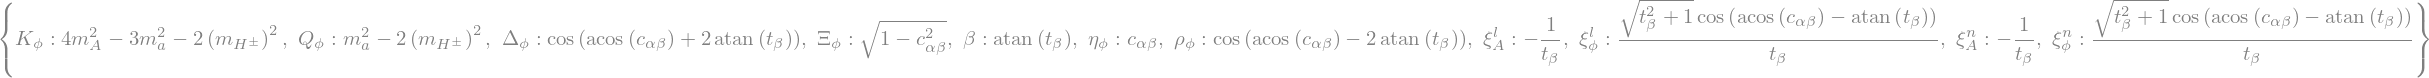

In [27]:
cambios_coeff_h

In [28]:
def FF_simplified2(A, mla, mlb, cambiosXYZ):
    return A.subs(cambiosXYZ).subs(lfvhd.D,4
                    ).simplify().subs(cambios_lab(mla,mlb)).subs(valoresSM).subs(UnuTwo).subs(cambios_coeff_h)

#### Diagrams with $W n_i n_j$ numeric

In [29]:
C0_mp_Wninj = lambda ms,mni_,mnj_: lfvhd_mp.C0(ms,mW_val,mni_,mnj_)
C1_mp_Wninj = lambda ms,mni_,mnj_,mla: lfvhd_mp.C1(ms,mla,mW_val,mni_,mnj_)
C2_mp_Wninj = lambda ms,mni_,mnj_,mlb: lfvhd_mp.C2(ms,mlb,mW_val,mni_,mnj_)
B120_mp_Wninj = lambda ms,mni_,mnj_: lfvhd_mp.B12_0(ms,mni_,mnj_)

FF_list_Wninj = []#.subs(lfvhd.D,4).subs(cambios_hab(a,b)).subs(valores).subs(UnuTwo)
for dia_Wninj in DiagramasWninj:
    A_sp_WninjL = lambda mla,mlb: FF_simplified2(dia_Wninj.AL(), mla, mlb, cambiosWninj)
    A_sp_WninjR = lambda mla,mlb: FF_simplified2(dia_Wninj.AR(), mla, mlb, cambiosWninj)
    
    
    #display(A_sp_WninjL(ml[1],ml[2]).atoms(Symbol))
    A_lamb_WninjL = lambda mla,mlb: lambdify([lfvhd.ma,mni,mnj,Ubj,Ucai,Cijs,Cijcs, tb, cab,
                   C0_sp,C1_sp,B120_sp], A_sp_WninjL(mla,mlb),'mpmath')
    
    A_lamb_WninjR = lambda mla,mlb: lambdify([lfvhd.ma,mni,mnj,Ubj,Ucai,Cijs,Cijcs, tb, cab,
                   C0_sp,C2_sp,B120_sp], A_sp_WninjR(mla,mlb),'mpmath')
    
    
    #.subs(typeI_ξh).subs(common_factor_h).subs(lfvhd.ma,mh).subs(mh,mpf('125.10'))
    def FFWninjL(ms_val,mla,mlb,mni_,mnj_,Ubj_,Ucai_,Cijs_,Cijcs_,tanb, Cab):
        return A_lamb_WninjL(mla,mlb)(
            ms_val,mni_,mnj_,Ubj_,Ucai_,Cijs_,Cijcs_, tanb, Cab,
            C0_mp_Wninj(ms_val,mni_,mnj_),C1_mp_Wninj(ms_val,mni_,mnj_,mla),
            B120_mp_Wninj(ms_val,mni_,mnj_)
        )
    def FFWninjR(ms_val,mla,mlb,mni_,mnj_,Ubj_,Ucai_,Cijs_,Cijcs_,tanb, Cab):
        return A_lamb_WninjR(mla,mlb)(
            ms_val,mni_,mnj_,Ubj_,Ucai_,Cijs_,Cijcs_, tanb, Cab,
            C0_mp_Wninj(ms_val,mni_,mnj_),
            C2_mp_Wninj(ms_val,mni_,mnj_,mlb),B120_mp_Wninj(ms_val,mni_,mnj_)
        )
    
    FF_list_Wninj.append({'L':FFWninjL,'R':FFWninjR})#
    

In [30]:
%%time
(
    FF_list_Wninj[0]['L'](mpf('125.10'),.2,.3,.4,.5,.6,.7,.8,.9,.10,.11),
    FF_list_Wninj[0]['R'](mpf('125.10'),.2,.3,.4,.5,.6,.7,.8,.9,.10,.11)
)

CPU times: user 1.69 s, sys: 7.92 ms, total: 1.7 s
Wall time: 1.8 s


((0.000000000037074498483347929955514511255162095067722717692331269666592103111326146385651681 - 0.0000000005841430056280976764445000862136327204539990201997351586828182255201368456618295j),
 (0.000000000047964168593892446779933519135957757821565316885046158610394247178402460118395672 - 0.00000000082464273870818467579759381024094874154219406270697581996392227783042146348236184j))

#### Diagrams with $H n_i n_j$ numeric

In [31]:
C0_mp_Hninj = lambda ms,mni_,mnj_,mHpm: lfvhd_mp.C0(ms,mHpm,mni_,mnj_)
C1_mp_Hninj = lambda ms,mni_,mnj_,mla,mHpm: lfvhd_mp.C1(ms,mla,mHpm,mni_,mnj_)
C2_mp_Hninj = lambda ms,mni_,mnj_,mlb,mHpm: lfvhd_mp.C2(ms,mlb,mHpm,mni_,mnj_)
B120_mp_Hninj = lambda ms,mni_,mnj_: lfvhd_mp.B12_0(ms,mni_,mnj_)

#FF_dicts1 = []#.subs(lfvhd.D,4).subs(cambios_hab(a,b)).subs(valores).subs(UnuTwo)
FF_list_Hninj = []
for dia_Hninj in DiagramasHninj:
    A_sp_HninjL = lambda mla,mlb: FF_simplified2(dia_Hninj.AL(), mla, mlb, cambiosHninj)
    A_sp_HninjR = lambda mla,mlb: FF_simplified2(dia_Hninj.AR(), mla, mlb, cambiosHninj)
    
    
    #display(A_sp_HninjL(ml[1],ml[2]).atoms(Symbol))
    A_lamb_HninjL = lambda mla,mlb: lambdify(
        [
            lfvhd.ma,mni,mnj,Ubj,Ucai,Cijs,Cijcs,mHpm,
            tb, cab,C0_sp,C1_sp,C2_sp,B120_sp
            ], A_sp_HninjL(mla,mlb),'mpmath')
    
    A_lamb_HninjR = lambda mla,mlb: lambdify(
        [
            lfvhd.ma,mni,mnj,Ubj,Ucai,Cijs,Cijcs,mHpm,
            tb, cab,C0_sp,C1_sp,C2_sp,B120_sp
            ], A_sp_HninjR(mla,mlb),'mpmath')
    
    #FF_dicts1.append({'L':A_lamb_HninjL,'R':A_lamb_HninjR})
    
    #for dictFF in FF_dicts1:
    def FFHninjL(ms_val,mla,mlb,mni_,mnj_,Ubj_,Ucai_,Cijs_,Cijcs_,mHpm,
                tanb, Cab):
        return A_lamb_HninjL(mla,mlb)(
            ms_val,mni_,mnj_,Ubj_,Ucai_,Cijs_,Cijcs_,mHpm,
            tanb, Cab,
            C0_mp_Hninj(ms_val,mni_,mnj_,mHpm),C1_mp_Hninj(ms_val,mni_,mnj_,mla,mHpm),
            C2_mp_Hninj(ms_val,mni_,mnj_,mlb,mHpm),B120_mp_Hninj(ms_val,mni_,mnj_)
        )
    def FFHninjR(ms_val,mla,mlb,mni_,mnj_,Ubj_,Ucai_,Cijs_,Cijcs_,mHpm,
                tanb, Cab):
        return A_lamb_HninjR(mla,mlb)(
            ms_val,mni_,mnj_,Ubj_,Ucai_,Cijs_,Cijcs_,mHpm,
            tanb, Cab,
            C0_mp_Hninj(ms_val,mni_,mnj_,mHpm),C1_mp_Hninj(ms_val,mni_,mnj_,mla,mHpm),
            C2_mp_Hninj(ms_val,mni_,mnj_,mlb,mHpm),B120_mp_Hninj(ms_val,mni_,mnj_)
        )
    FF_list_Hninj.append({'L':FFHninjL,'R':FFHninjR})

In [51]:
%%time
(
    FF_list_Hninj[0]['L'](mpf('125.10'),.2,.3,.4,.5,.6,.7,.8,.9,.10,.11,.12),
    FF_list_Hninj[0]['R'](mpf('125.10'),.2,.3,.4,.5,.6,.7,.8,.9,.10,.11,.12)
)

CPU times: user 11.9 s, sys: 1.82 ms, total: 11.9 s
Wall time: 12 s


((0.00000003579986468339378689290383688902106592165908790344646834754180428587740714247083 - 0.0000000146997771804335009048635414333467736762954045439665420026051960516665057345855j),
 (0.000000043526708622543978164033885826628556489166013675632298018863968754945441369605853 - 0.000000017870854788801981753705238381622184534933017847301040669487478024276078977088197j))

In [32]:
m6 = mpf('1e15')
mnk,UnuL,UnuR = diagonalizationMnu1(m1,m6)

In [33]:
# l_niWW = len(FF_list_niWW) #ms_val,mla,mlb,mni_,Ubi_,Ucai_,Xi_phi,xi_lphi
# l_niWH = len(FF_list_niWH) #ms_val,mla,mlb,mni_,Ubi_,Ucai_,mHpm,xi_lA,xi_nA,etaphi
# l_niHW = len(FF_list_niHW) #ms_val,mla,mlb,mni_,Ubi_,Ucai_,mHpm,xi_lA,xi_nA,etaphi
# l_niHH = len(FF_list_niHH) #(ms_val,mla,mlb,mni_,Ubi_,Ucai_,mHpm,
#                            #beta,l5,xi_lphi,xi_lA,xi_nA,Dphi,Kphi,Qphi,rhophi)


def sum_diagrams(aa,bb,ms_val,mHpm, tanb, Cab,l5,quirality='L'):
    
    # mnk,UnuL,UnuR = diagonalizationMnu1(m1,m6)
    Unu = UnuL
    Unu_dagger = UnuR
    mla = ml[aa]
    mlb = ml[bb]
    if quirality=='L':
        pass
    elif quirality=='R':
        pass
    else:
    
        raise ValueError('quirality must be L or R')
    
    FFOne = 0
    for k in range(1,7):
        for FF_dict in FF_list_niWW:
            FFOne += FF_dict[quirality](ms_val,mla,mlb,
            mnk[k-1],Unu[bb-1,k-1],Unu_dagger[k-1,aa-1],
            tanb, Cab)
        
        for FF_dict in FF_list_niHW:
            FFOne += FF_dict[quirality](ms_val,mla,mlb,
            mnk[k-1],Unu[bb-1,k-1],Unu_dagger[k-1,aa-1],
            mHpm, tanb, Cab)
        
        for FF_dict in FF_list_niWH:
            FFOne += FF_dict[quirality](ms_val,mla,mlb,
            mnk[k-1],Unu[bb-1,k-1],Unu_dagger[k-1,aa-1],
            mHpm, tanb, Cab)
            
        for FF_dict in FF_list_niHH:
            FFOne += FF_dict[quirality](ms_val,mla,mlb,
            mnk[k-1],Unu[bb-1,k-1],Unu_dagger[k-1,aa-1],
            mHpm,tanb, Cab,l5)
    
    FFTwo = 0
    Cij = lambda i,j: mp.fsum([Unu[c,i]*Unu_dagger[j,c] for c in range(3)])

    for p in range(1,7):
        for q in range(1,7):
            for FF_dict in FF_list_Wninj:
                FFTwo += FF_dict[quirality](ms_val,mla,mlb,
                mnk[p-1],mnk[q-1],Unu[bb-1,q-1],Unu_dagger[p-1,aa-1],
                Cij(p-1,q-1),conj(Cij(p-1,q-1)), tanb, Cab)
            
            for FF_dict in FF_list_Hninj:
                FFTwo += FF_dict[quirality](ms_val,mla,mlb,
                mnk[p-1],mnk[q-1],
                Unu[bb-1,q-1],Unu_dagger[p-1,aa-1],
                Cij(p-1,q-1),conj(Cij(p-1,q-1)),
                mHpm, tanb, Cab)
    FFtotal = FFTwo + FFOne
    return FFtotal

In [34]:
# l_niWW = len(FF_list_niWW) #ms_val,mla,mlb,mni_,Ubi_,Ucai_,Xi_phi,xi_lphi
# l_niWH = len(FF_list_niWH) #ms_val,mla,mlb,mni_,Ubi_,Ucai_,FFTwo = sum_Wninj + sum_HninjmHpm,xi_lA,xi_nA,etaphi
# l_niHW = len(FF_list_niHW) #ms_val,mla,mlb,mni_,Ubi_,Ucai_,mHpm,xi_lA,xi_nA,etaphi
# l_niHH = len(FF_list_niHH) #(ms_val,mla,mlb,mni_,Ubi_,Ucai_,mHpm,
#                            #beta,l5,xi_lphi,xi_lA,xi_nA,Dphi,Kphi,Qphi,rhophi)

def sum_diagrams2(aa,bb,ms_val,mHpm, tanb, Cab,l5,quirality='L'):
    
    # mnk,UnuL,UnuR = diagonalizationMnu1(m1,m6)
    Unu = UnuL
    Unu_dagger = UnuR
    mla = ml[aa]
    mlb = ml[bb]
    if quirality=='L':
        pass
    elif quirality=='R':
        pass
    else:
        raise ValueError('quirality must be L or R')
    
    sum_niWW = sum(FF_dict[quirality](ms_val,mla,mlb,
            mnk[k-1],Unu[bb-1,k-1],Unu_dagger[k-1,aa-1],
            tanb, Cab)
            for FF_dict in FF_list_niWW for k in range(1,7))
        
    sum_niHW = sum(FF_dict[quirality](ms_val,mla,mlb,
            mnk[k-1],Unu[bb-1,k-1],Unu_dagger[k-1,aa-1],
            mHpm,tanb, Cab) 
            for FF_dict in FF_list_niHW for k in range(1,7))
        
    sum_niWH = sum(FF_dict[quirality](ms_val,mla,mlb,
            mnk[k-1],Unu[bb-1,k-1],Unu_dagger[k-1,aa-1],
            mHpm,tanb, Cab)
            for FF_dict in FF_list_niWH for k in range(1,7))
            
    sum_niHH = sum(FF_dict[quirality](ms_val,mla,mlb,
            mnk[k-1],Unu[bb-1,k-1],Unu_dagger[k-1,aa-1],
            mHpm, tanb, Cab,l5)
            for FF_dict in FF_list_niHH for k in range(1,7))

    FFOne = sum_niHH + sum_niWH + sum_niHW + sum_niWW
    Cij = lambda i,j: mp.fsum([Unu[c,i]*Unu_dagger[j,c] for c in range(3)])

    sum_Wninj = sum(FF_dict[quirality](ms_val,mla,mlb,
    mnk[p-1],mnk[q-1],Unu[bb-1,q-1],Unu_dagger[p-1,aa-1],
    Cij(p-1,q-1),conj(Cij(p-1,q-1)), tanb, Cab)
    for FF_dict in FF_list_Wninj for p in range(1,7) for q in range(1,7))
            
    sum_Hninj = sum(FF_dict[quirality](ms_val,mla,mlb,
                mnk[p-1],mnk[q-1],
                Unu[bb-1,q-1],Unu_dagger[p-1,aa-1],
                Cij(p-1,q-1),conj(Cij(p-1,q-1)),
                mHpm, tanb, Cab)
                for FF_dict in FF_list_Hninj for p in range(1,7) for q in range(1,7))
    FFTwo = sum_Wninj + sum_Hninj
    FFtotal = FFTwo + FFOne
    return FFtotal

In [35]:
Cij = lambda i,j: mp.fsum([UnuL[c,i]*UnuR[j,c] for c in range(3)])

In [36]:
def sum_diagrams3(aa,bb,ms_val,mHpm, tanb, Cab,l5,quirality='L'):
    
    # mnk,UnuL,UnuR = diagonalizationMnu1(m1,m6)
    Unu = UnuL
    Unu_dagger = UnuR
    mla = ml[aa]
    mlb = ml[bb]
    if quirality=='L':
        pass
    elif quirality=='R':
        pass
    else:
        raise ValueError('quirality must be L or R')
    
    # sum_niWW = fsum(FF_dict[quirality](ms_val,mla,mlb,
    #         mnk[k-1],Unu[bb-1,k-1],Unu_dagger[k-1,aa-1],
    #         tanb, Cab)
    #         for FF_dict in FF_list_niWW for k in range(1,7))
        
    # sum_niHW = fsum(FF_dict[quirality](ms_val,mla,mlb,
    #         mnk[k-1],Unu[bb-1,k-1],Unu_dagger[k-1,aa-1],
    #         mHpm,tanb, Cab) 
    #         for FF_dict in FF_list_niHW for k in range(1,7))
        
    # sum_niWH = fsum(FF_dict[quirality](ms_val,mla,mlb,
    #         mnk[k-1],Unu[bb-1,k-1],Unu_dagger[k-1,aa-1],
    #         mHpm,tanb, Cab)
    #         for FF_dict in FF_list_niWH for k in range(1,7))
            
    # sum_niHH = fsum(FF_dict[quirality](ms_val,mla,mlb,
    #         mnk[k-1],Unu[bb-1,k-1],Unu_dagger[k-1,aa-1],
    #         mHpm, tanb, Cab,l5)
    #         for FF_dict in FF_list_niHH for k in range(1,7))

    #FFOne = sum_niWW + sum_niWH + sum_niHW + sum_niHH
    # Cij = lambda i,j: mp.fsum([Unu[c,i]*Unu_dagger[j,c] for c in range(3)])

    sum_Wninj = fsum(
        FF_dict[quirality](ms_val,mla,mlb,
        mnk[p-1],mnk[q-1],Unu[bb-1,q-1],Unu_dagger[p-1,aa-1],
        Cij(p-1,q-1),conj(Cij(p-1,q-1)),tanb, Cab)
    for FF_dict in [FF_list_Wninj[0]] for p in range(1,7) for q in range(1,7)
    if not (p < 4 and q < 4))
            
    sum_Hninj = fsum(FF_dict[quirality](ms_val,mla,mlb,
                mnk[p-1],mnk[q-1],
                Unu[bb-1,q-1],Unu_dagger[p-1,aa-1],
                Cij(p-1,q-1),conj(Cij(p-1,q-1)),
                mHpm,tanb, Cab)
                for FF_dict in FF_list_Hninj for p in range(1,7) for q in range(1,7)
                if not (p < 4 and q < 4))
    FFTwo = sum_Wninj + sum_Hninj
    #FFtotal = FFTwo + FFOne
    return FFTwo # FFtotal

In [37]:
mh = mpf('125.10')
mHval = mpf('1500')

In [99]:
%%time

suma1 = sum_diagrams(1,2,mh,mHval,5,6,7,'L')
suma1

CPU times: user 4min 31s, sys: 264 ms, total: 4min 31s
Wall time: 4min 32s


(-0.0000000000000000000000021473375561634432274914859465979557012451848557443238383176538481925516242858126 - 0.000000000000000000000010586516038582761152788324254733892554009765327962649083055740118641187695768723j)

In [100]:
%%time

suma2 = sum_diagrams2(1,2,mh,mHval,5,6,7,'L')
suma2

CPU times: user 4min 15s, sys: 192 ms, total: 4min 15s
Wall time: 4min 15s


(-0.0000000000000000000000021473375561634432274914859465979557012451848557443238383176538481917838726990895 - 0.000000000000000000000010586516038582761152788324254733892554009765327962649083055740118586476111044705j)

In [58]:
%%time

suma3 = sum_diagrams3(1,2,mh,mHval,5,6,7,'L')
suma3n

CPU times: user 2min 29s, sys: 77.9 ms, total: 2min 29s
Wall time: 2min 29s


(-0.0000000000000000000000021473374978735582650650614518179270919384862090402723581089331817017263894587731 - 0.000000000000000000000010586516632217894004848798199708032210017870806452012127447317844407685838365744j)

In [125]:
abs(suma3/suma1)

1.0000000527860455979605830443615151622966579188005173788023812074805180904492952

In [103]:
# from modelos_2HDM import typeI_h, typeII_h, Lepton_specific_h,Flipped_h, alphaf, betaf

In [38]:

def numeric_sum_diagrams(ms,a,b,mHpm, mA, Cab, l5,quirality='L'):
    if quirality=='L':
        pass
    elif quirality=='R':
        pass
    else:
        raise ValueError('quirality must be L or R')
    
    def FFOne(tanb):
        out = sum_diagrams3(a,b,ms,mHpm,tanb, Cab,l5,quirality)
        return out
    return FFOne

In [39]:
%%time
nprint(numeric_sum_diagrams(mpf('500.1'),1,2,mpf('550'), mpf('600'), 0.01,0.1,quirality='L')(1))

(-2.10289e-23 - 1.62858e-67j)
CPU times: user 2min 21s, sys: 74.3 ms, total: 2min 21s
Wall time: 2min 21s


## Total Form Factors

In [40]:

def ALtot23(ms,mHpm, mA, tb, cab, l5):
    return numeric_sum_diagrams(ms,2,3,mHpm, mA, cab, l5, quirality='L')(tb)
def ARtot23(ms,mHpm, mA, tb, cab, l5):
    return numeric_sum_diagrams(ms,2,3,mHpm, mA, cab, l5, quirality='R')(tb)


def ALtot13(ms,mHpm, mA, tb, cab, l5):
    return numeric_sum_diagrams(ms,1,3,mHpm, mA, cab, l5, quirality='L')(tb)
def ARtot13(ms,mHpm, mA, tb, cab, l5):
    return numeric_sum_diagrams(ms,1,3,mHpm, mA, cab, l5, quirality='R')(tb)


def ALtot12(ms,mHpm, mA, tb, cab, l5):
    return numeric_sum_diagrams(ms,1,2,mHpm, mA, cab, l5, quirality='L')(tb)
def ARtot12(ms,mHpm, mA, tb, cab, l5):
    return numeric_sum_diagrams(ms,1,2,mHpm, mA, cab, l5, quirality='R')(tb)


In [114]:
%%time
nprint(ALtot23(mpf('125.1'),mpf('500'), mpf('600'), 0.1, 0.2, 0.2))

(-6.54432e-58 - 3.66843e-11j)
CPU times: user 2min 17s, sys: 48 ms, total: 2min 17s
Wall time: 2min 17s


## Width decay of $h \to e_a e_b$

In [41]:
from OneLoopLFVHD import Γhlilj 

In [42]:
mHpm_val = mp.mpf('1500.0') 
mA_val = mp.mpf('1300.0') 
l5_val = mp.mpf('1') 
# m6_val = mp.mpf('1e15')
cab_val = mpf('0.0')
mh_val = mpf('125.1')
# Φ =2

In [43]:
def Γhl2l3_2HDM(tb):
    AL = ALtot23(ms=mh_val,mHpm=mHpm_val, mA=mA_val,
                 tb=tb, cab=cab_val, l5=l5_val)
    AR = ARtot23(ms=mh_val,mHpm=mHpm_val, mA=mA_val,
                 tb=tb, cab=cab_val, l5=l5_val)
    return Γhlilj(AL,AR,ma=mh_val,mi=ml[2],mj=ml[3])
    # mla = ml[aa]
    # mlb = ml[bb]
def Γhl1l3_2HDM(tb):
    AL = ALtot13(ms=mh_val,mHpm=mHpm_val, mA=mA_val,
                 tb=tb, cab=cab_val, l5=l5_val)
    AR = ARtot13(ms=mh_val,mHpm=mHpm_val, mA=mA_val,
                 tb=tb, cab=cab_val, l5=l5_val)
    return Γhlilj(AL,AR,ma=mh_val,mi=ml[1],mj=ml[3])

def Γhl1l2_2HDM(tb):
    AL = ALtot12(ms=mh_val,mHpm=mHpm_val, mA=mA_val,
                 tb=tb, cab=cab_val, l5=l5_val)
    AR = ARtot12(ms=mh_val,mHpm=mHpm_val, mA=mA_val,
                 tb=tb, cab=cab_val, l5=l5_val)
    return Γhlilj(AL,AR,ma=mh_val,mi=ml[1],mj=ml[2])

In [73]:
%%time 
nprint(Γhl1l2_2HDM(0.1))

2.05318e-29
CPU times: user 5min 9s, sys: 600 ms, total: 5min 10s
Wall time: 5min 10s


In [44]:
def speedup_array(f,array,procs=4): 
    pool = Pool(procs,maxtasksperchild=100).map(f, array) 
    result = np.array(list(pool))
    #pool.close()
    return result

In [46]:
n = 5
# tbmp = linspace(0.1,100,n)
expmp = linspace(-1,2,n)
tbmp = np.array([mpf('10.0')**k for k in expmp])#np.logspace(-1,15,n)

In [47]:
%%time
YW23 = speedup_array(Γhl2l3_2HDM,tbmp)

YW13 = speedup_array(Γhl1l3_2HDM,tbmp)

YW12 = speedup_array(Γhl1l2_2HDM,tbmp)

CPU times: user 3.66 s, sys: 1.34 s, total: 5 s
Wall time: 52min 36s


In [48]:
Wtot = YW23 + YW13 + YW12 + 0.0032

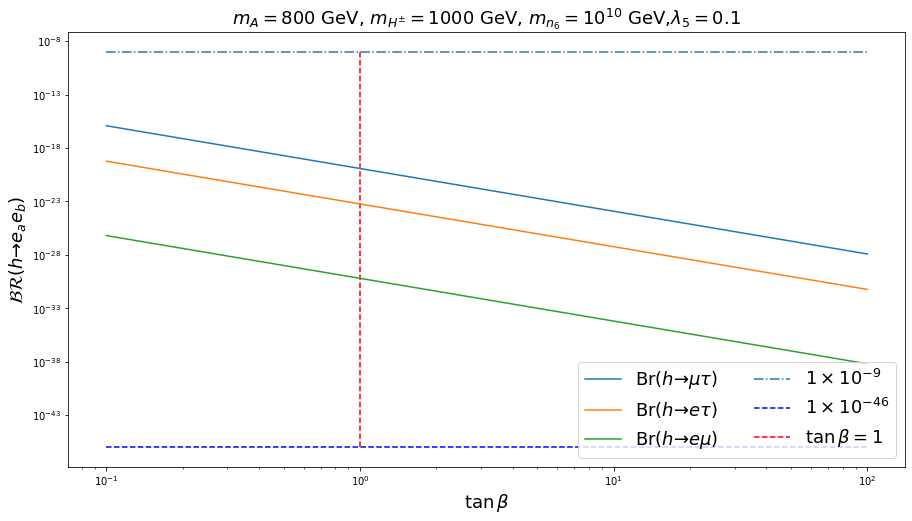

In [50]:
plt.figure(figsize=(15,8))
plt.loglog(np.real(tbmp),(YW23)/Wtot,label=r'Br($h \to \mu \tau$)')
plt.loglog(np.real(tbmp),(YW13)/Wtot,label=r'Br($h \to e \tau$)')
plt.loglog(np.real(tbmp),(YW12)/Wtot,label=r'Br($h \to e \mu$)')

# Horizontal lines
plt.hlines(1e-9,0.1,1e2,linestyles='-.',label=r'$1\times 10^{-9}$')
plt.hlines(1e-46,0.1,1e2,linestyles='--',color='b',label=r'$1\times 10^{-46}$')

# Vertical lines
plt.vlines(1,1e-46,1e-9,linestyles='--',color='r',label=r'$\tan{\beta}=1$')

#Axis
#plt.yticks([1e-49,1e-39,1e-29,1e-19,1e-9],fontsize=18)
#plt.xticks([0.1,1,10,100],fontsize=18)
plt.xlabel(r'$\tan{\beta}$',fontsize=18)
plt.ylabel(r'$\mathcal{BR}(h \to e_a e_b)$',fontsize=18)


plt.title(r'$m_A=800$ GeV, $m_{H^{\pm}}=1000$ GeV, $m_{n_6}={10^{10}}$ GeV,$\lambda_5=0.1$',fontsize=18)
plt.legend(fontsize=18,frameon=True,ncol=2,loc=4)
#plt.savefig('2HDM-lepton-specific-Cba0.95-caso5.png',dpi=100)

In [66]:
import pandas as pd

In [67]:
df = pd.DataFrame({'tb':tbmp,
                   'Whl2l3':YW23,
                   #'Whl3l2':YW32,
                   'Whl1l3':YW13,
                   #'Whl3l1':YW31,
                   'Whl1l2':YW12})
                   #'Whl2l1':YW21})

In [68]:
df.to_csv('Lepton_specific_Cab095_caso5_mA800_mHpm1000.txt',sep='\t')

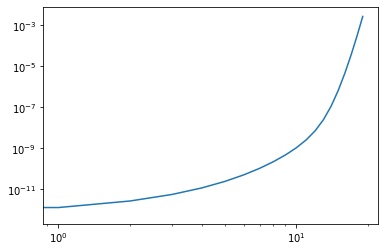

In [69]:
plt.loglog(np.array(list(map(mpf,df['tb']))),np.array(list(map(mpf,df['Whl2l3']))))